# Projeto Final:
Nesse projeto nosso objetivo é: 

- Buscar termos específicos
- Salvar resultados em um arquivo txt
- Mostrar os resultados sobre as imagens dos termos específicos


## 1.Preparando o ambiente

### Bibliotecas e dados

In [2]:
!pip install opencv-python~=4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr 

In [1]:
! git clone https://github.com/guilherme-alves-silve/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 148 (delta 34), reused 140 (delta 30), pack-reused 0
Receiving objects: 100% (148/148), 37.21 MiB | 26.70 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [1]:
import pytesseract
import numpy as np
import cv2 
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow 

In [2]:
pytesseract.__version__

'0.3.9'

In [3]:
cv2.__version__

'4.6.0'

In [4]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2022-10-02 17:09:44--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-10-02 17:09:45--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2022-10-02 17:09:45--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

### Entendendo os dados

In [5]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)

['/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png']


In [6]:
def mostrar(img):
  fig = plt.gcf() # busca a figura atual
  fig.set_size_inches(20, 10) #define o tamanho
  plt.axis("off") #remove a visualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
  plt.show() # mostra a imagem

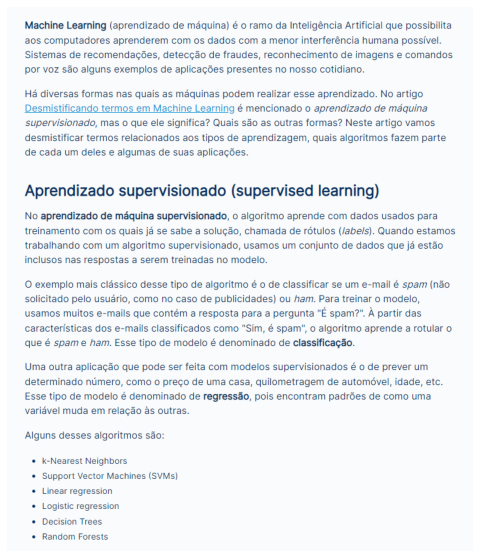

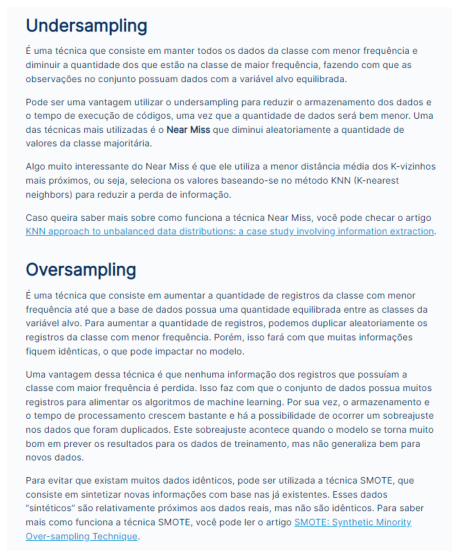

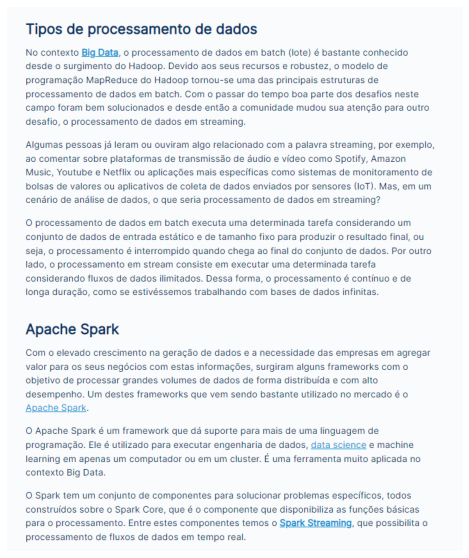

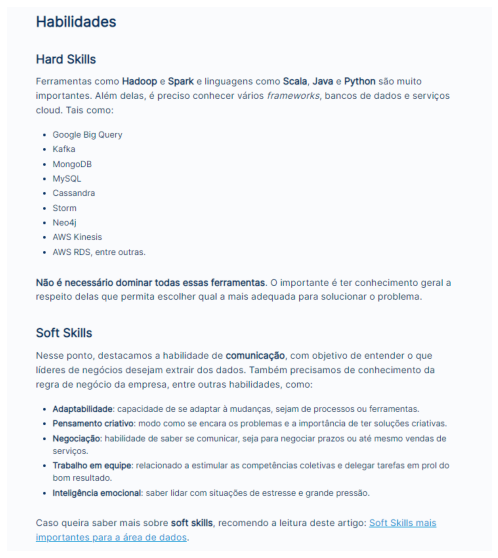

In [7]:
for imagem in caminho:
  imagem = cv2.imread(imagem) 
  mostrar(imagem)

In [8]:
config_tesseract = "--tessdata-dir tessdata"

def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

## 2.Reconhecimento do texto

In [9]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'

In [10]:
 for imagem in caminho:
   img = cv2.imread(imagem)
   nome_imagem = os.path.split(imagem)[-1]
   nome_divisao = '===================\n' + str(nome_imagem)
   texto_completo = texto_completo + nome_divisao + '\n'
   texto = OCR_processa(img, config_tesseract)
   texto_completo = texto_completo + texto

In [11]:
texto_completo

'===================\nartigo-termos-ML.png\nMachine Learning (aprendizado de máquina) é o ramo da Inteligência Artificial que possibilita\naos computadores aprenderem com os dados com a menor interferência humana possível.\nSistemas de recomendações, detecção de fraudes, reconhecimento de imagens e comandos\npor voz são alguns exemplos de aplicações presentes no nosso cotidiano.\n\nHá diversas formas nas quais as máquinas podem realizar esse aprendizado. No artigo\nDesmistificando termos em Machine Learning é mencionado o aprendizado de máquina\nsupervisionado, mas o que ele significa? Quais são as outras formas? Neste artigo vamos\ndesmistificar termos relacionados aos tipos de aprendizagem, quais algoritmos fazem parte\nde cada um deles e algumas de suas aplicações.\n\nAprendizado supervisionado (supervised learning)\n\nNo aprendizado de máquina supervisionado, o algoritmo aprende com dados usados para\n\ntreinamento com os quais já se sabe a solução, chamada de rótulos (/abels). Qua

In [12]:
## Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') # a+ é para colocar no final do arquivo, w+ para sobre escrever o arquivo
arquivo_txt.write(texto_completo + '\n') #passa o texto que quer adicionar
arquivo_txt.close()

## 3.Busca de ocorrências

### Nos textos

In [13]:
termo_pesquisa = 'learning'

In [14]:
with open(nome_txt) as f: # abre o documento txt
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())] #ocorrencia é uma lista. 
  #inicia-se em i e o termo re é de expressões regulares, o módulo finditer é para encontrar um termo de pesquisa dentro do arquivo
  #por isso os parâmetros são, respectivamente, termo_pesquisa e arquivo a ser lido.

In [15]:
ocorrencias

[807, 3665, 6346]

### Na listagem de imagens

In [16]:
for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print('=================\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)
  
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print(f'Número de ocorrências para o termo: {termo_pesquisa}: {len(ocorrencias)}.\n')

artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1.

artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1.

artigo-spark.png
Número de ocorrências para o termo: learning: 1.

artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0.



In [21]:
termo_pesquisa = 'ambiente'
atividade = '/content/text-recognize/Atividades/Aula 5'
caminho = [os.path.join(atividade, f) for f in os.listdir(atividade)]

for imagem in caminho:
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print('=================\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)
  
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print(f'Número de ocorrências para o termo: {termo_pesquisa}: {len(ocorrencias)}.\n')

Aula5-Microstrategy.png
Número de ocorrências para o termo: ambiente: 0.

Aula5-Ambientes_Virtuais.png
Número de ocorrências para o termo: ambiente: 13.

Aula5-GitHub.png
Número de ocorrências para o termo: ambiente: 0.

Aula5-ROC.png
Número de ocorrências para o termo: ambiente: 0.

Aula5-Visao.png
Número de ocorrências para o termo: ambiente: 1.



## 4.Reconhecimento na imagem

In [22]:
fonte_dir = '/content/text-recognize/Imagens/calibri.ttf'

In [23]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img) 
  draw = ImageDraw.Draw(img_pil) 
  draw.text((x, y-tamanho), texto, font=fonte, fill=cor) 
  img = np.array(img_pil) 

  return img

In [24]:
min_conf = 30  #@param {type:"slider", min:0, max:100}

In [25]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]
    
  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [27]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  for i in range(len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i] #texto será igual ao resultado text no momento i 
      if termo_pesquisa in texto: #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0, 0, 255)) # faz a caixa de bounding box
        img = escreve_texto(texto, x, y, img, fonte_dir, (50, 50, 225), 14) #escreve o texto 
        
        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto

  return img, num_ocorrencias

Aula5-Microstrategy.png
Número de ocorrências para learning em Aula5-Microstrategy.png: 0




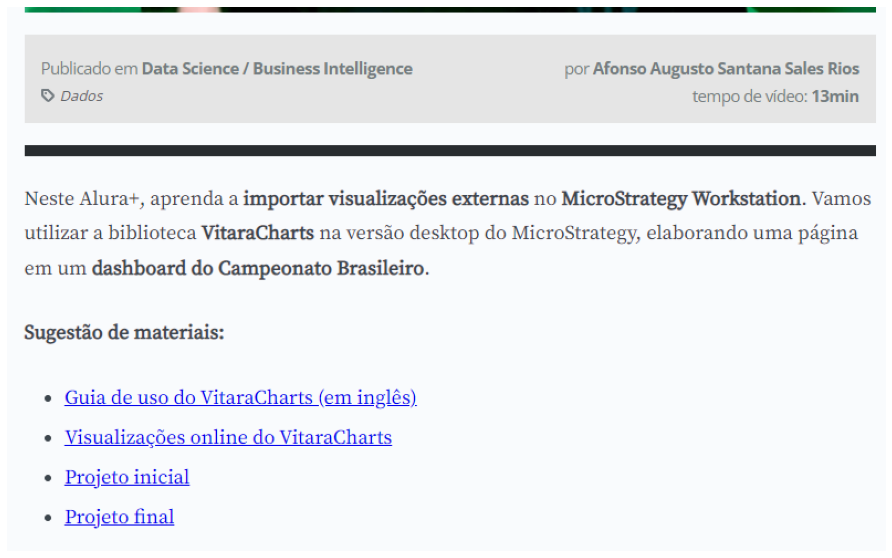

Aula5-Ambientes_Virtuais.png
Número de ocorrências para learning em Aula5-Ambientes_Virtuais.png: 0




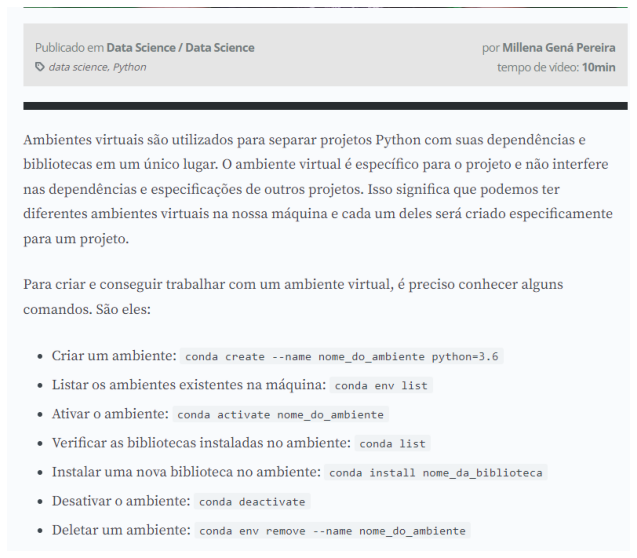

Aula5-GitHub.png
Número de ocorrências para learning em Aula5-GitHub.png: 0




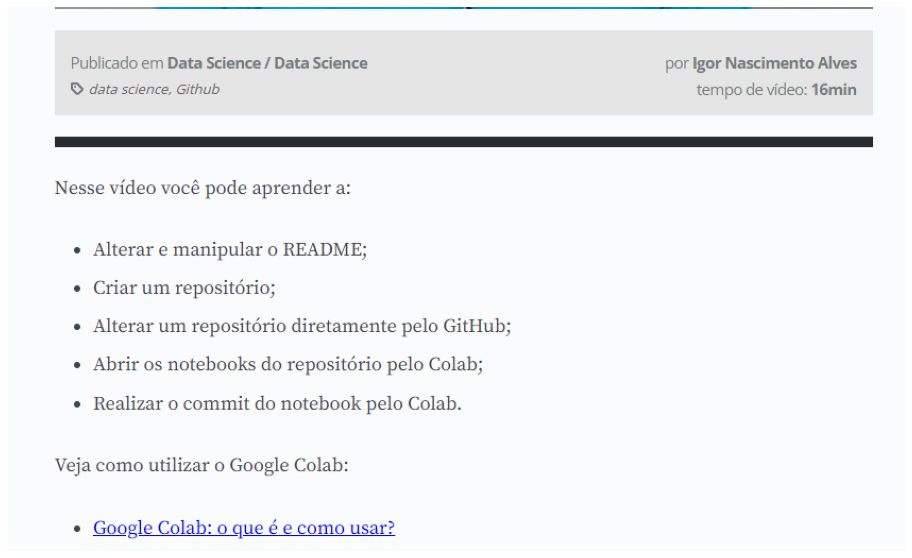

Aula5-ROC.png
Número de ocorrências para learning em Aula5-ROC.png: 0




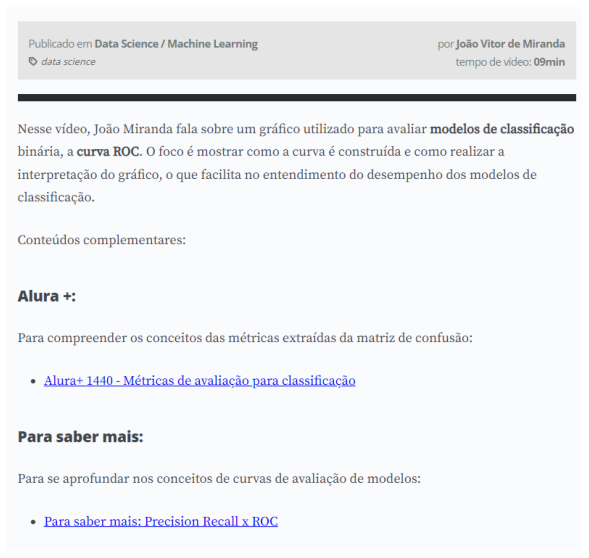

Aula5-Visao.png
Número de ocorrências para learning em Aula5-Visao.png: 1




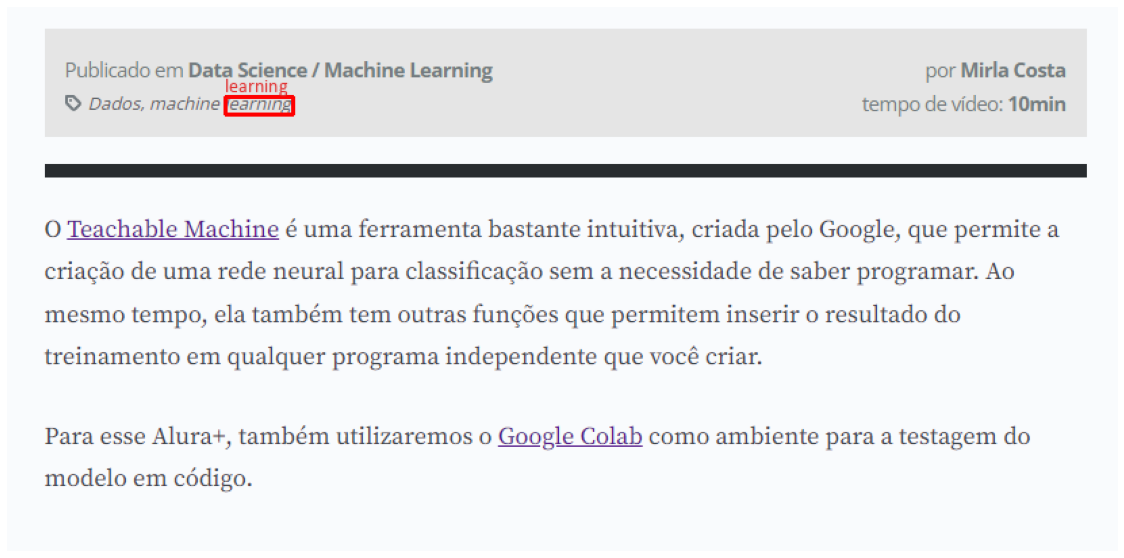

In [28]:
termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('===================\n' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')

  mostrar(img)

## Desafio - Reconhecendo letras maíusculas e minúsculas

In [30]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  termo_pesquisa = termo_pesquisa.upper()
  for i in range(len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i].upper() #texto será igual ao resultado text no momento i 
      if termo_pesquisa in texto: #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0, 0, 255)) # faz a caixa de bounding box
        img = escreve_texto(texto, x, y, img, fonte_dir, (50, 50, 225), 14) #escreve o texto 
        
        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto

  return img, num_ocorrencias

Aula5-Microstrategy.png
Número de ocorrências para learning em Aula5-Microstrategy.png: 0




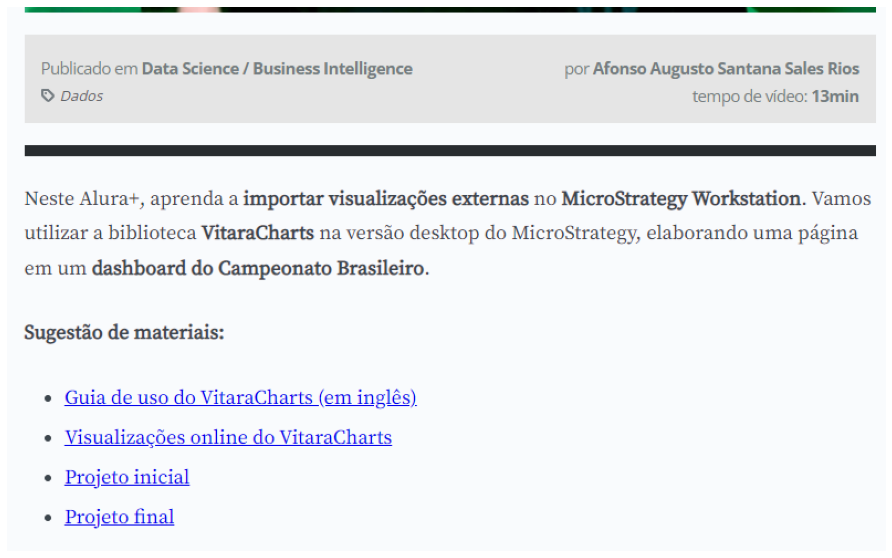

Aula5-Ambientes_Virtuais.png
Número de ocorrências para learning em Aula5-Ambientes_Virtuais.png: 0




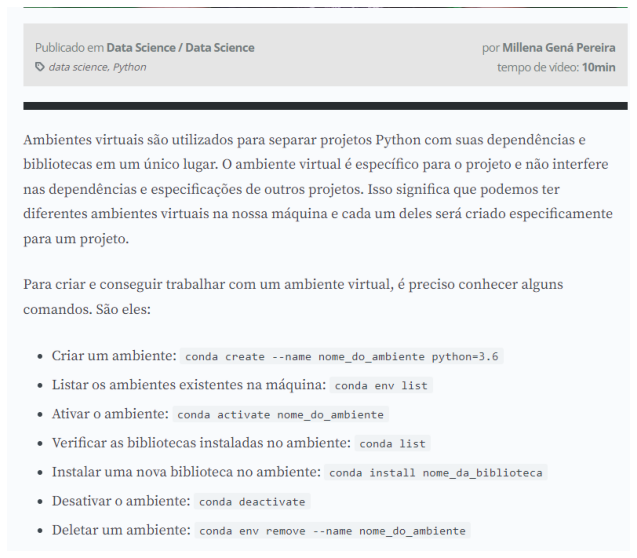

Aula5-GitHub.png
Número de ocorrências para learning em Aula5-GitHub.png: 0




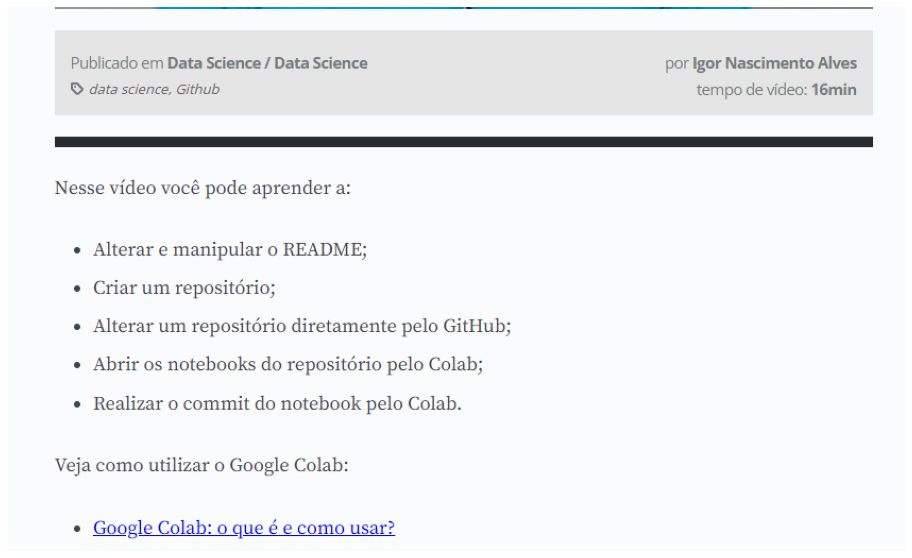

Aula5-ROC.png
Número de ocorrências para learning em Aula5-ROC.png: 1




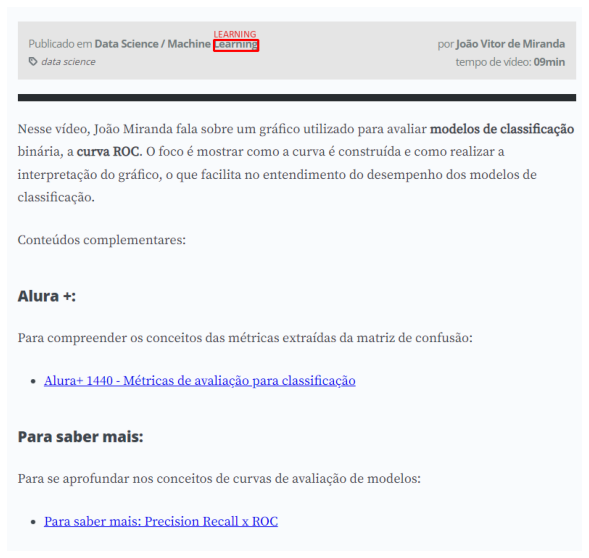

Aula5-Visao.png
Número de ocorrências para learning em Aula5-Visao.png: 2




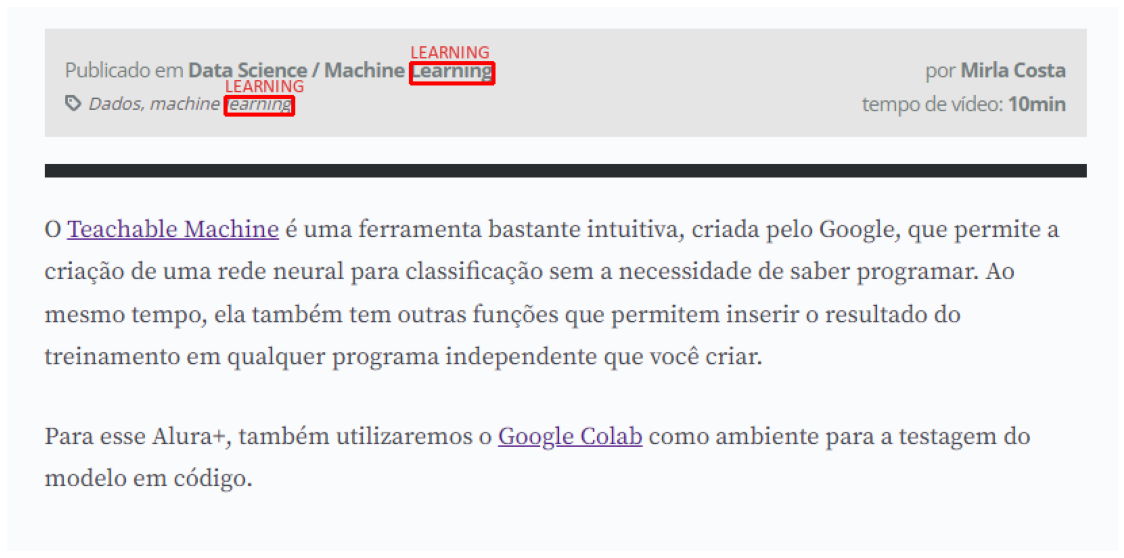

In [31]:
termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('===================\n' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')

  mostrar(img)

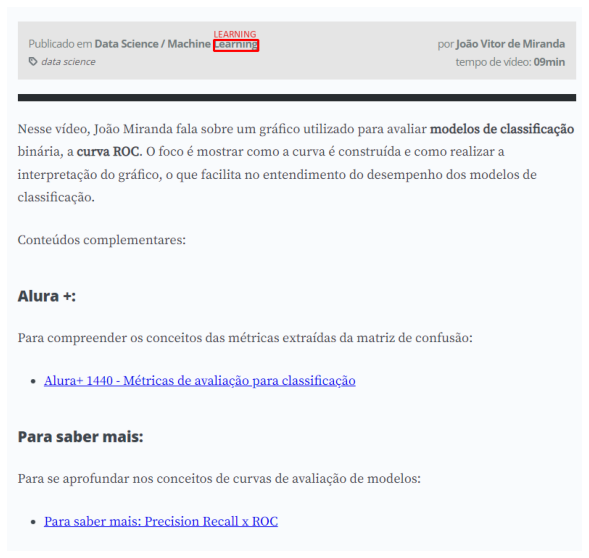

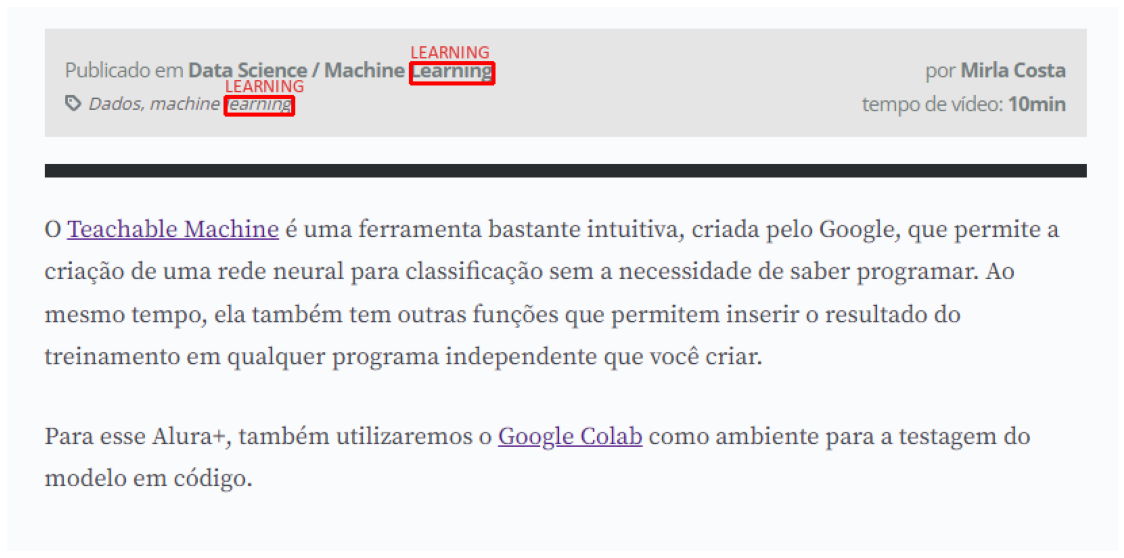

In [32]:
import os

os.makedirs('images_project', exist_ok=True)

termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem)
  img_original = img.copy()
  nome_imagem = os.path.split(imagem)[-1]
  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  
  if numero_ocorrencias > 0:
    mostrar(img)
    novo_nome_imagem = 'OCR_' + nome_imagem
    nova_imagem = 'images_project/' + str(novo_nome_imagem)
    cv2.imwrite(nova_imagem, img)